In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')


# Let's implement Velocity Verlet integration for a simple harmonic oscillator
def velocity_verlet_step(q, p, dt, a, omega):
    # Update velocity by half step
    p += 0.5 * a * dt
    # Update position by full step
    q += p * dt
    # Compute acceleration at new position
    a_t_dt = -omega**2 * q
    new_a = a_t_dt
    # Update velocity by another half step
    p += 0.5 * a_t_dt * dt
    return q, p, new_a

def run(pmega, dt, T, q=1, p=0):
    steps = int(T / dt)
    a_t = -pmega**2 * q  # Initial acceleration
    q_traj = np.zeros(steps)
    p_traj = np.zeros(steps)
    for i in range(steps):
        q, p, a_t = velocity_verlet_step(q, p, dt, a_t, pmega)
        q_traj[i] = q
        p_traj[i] = p
    return q_traj, p_traj

# Parameters
omega = 1.0  # Angular frequency
dt = 0.01    # Time step
total_time = 120.0  # Total simulation time
steps = int(total_time / dt)    
# Initial conditions
q = 1.0
p = 0.0
# Run simulation
q_traj, p_traj = run(omega, dt, total_time, q, p)

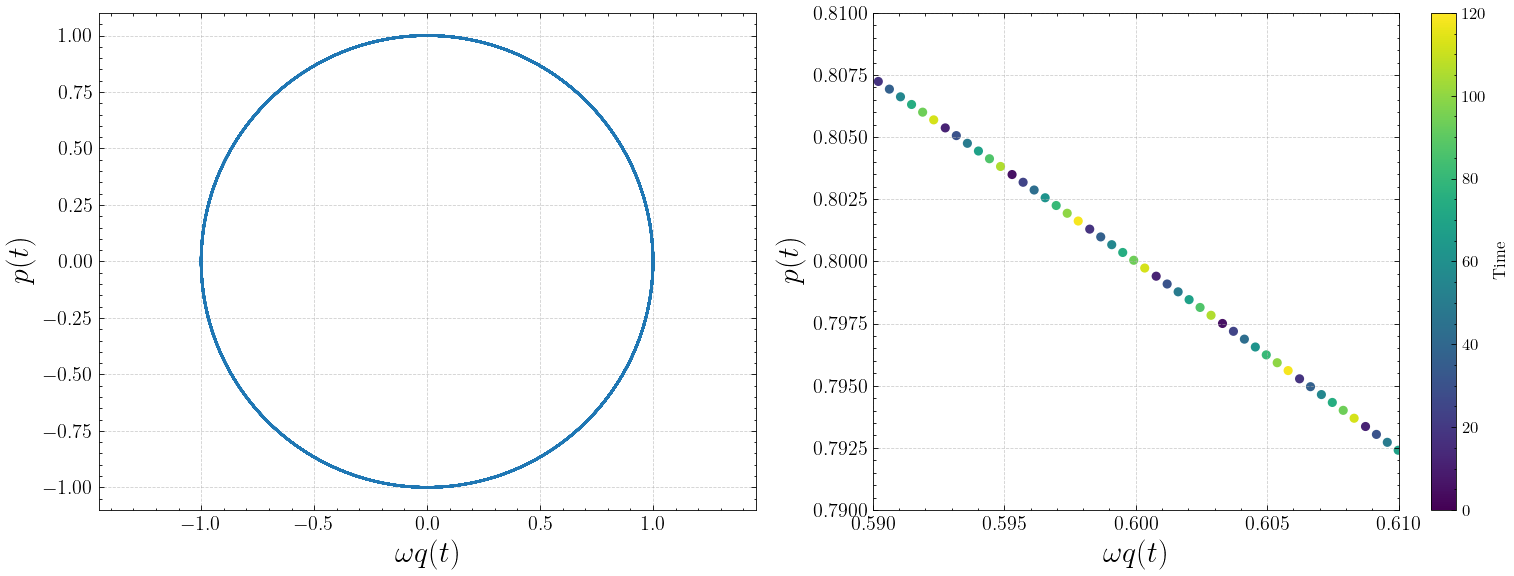

In [134]:
# Divide into two fgures for better visualization
plt.figure(figsize=(13, 5), dpi=120)
plt.subplot(1, 2, 1)
plt.plot(omega*q_traj, p_traj, label='Trajectory', color='tab:blue', linewidth=1.5)
plt.xlabel(r'$\omega q(t)$', fontsize=18)
plt.ylabel(r'$p(t)$', fontsize=18)
plt.axis('equal')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.tight_layout()

# Zoomed-in view with smaller window
plt.subplot(1, 2, 2)
plt.xlim(0.59, 0.61)
plt.ylim(0.79, 0.81)
t = np.linspace(0, total_time, len(q_traj))
sc = plt.scatter(q_traj, p_traj, c = t, s=20, linewidth=1)
plt.xlabel(r'$\omega q(t)$', fontsize=18)
plt.ylabel(r'$p(t)$', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.colorbar(sc, label='Time')
plt.tight_layout()
#plt.savefig('fig/phase_space_trajectory.pdf', dpi=300)
plt.show()

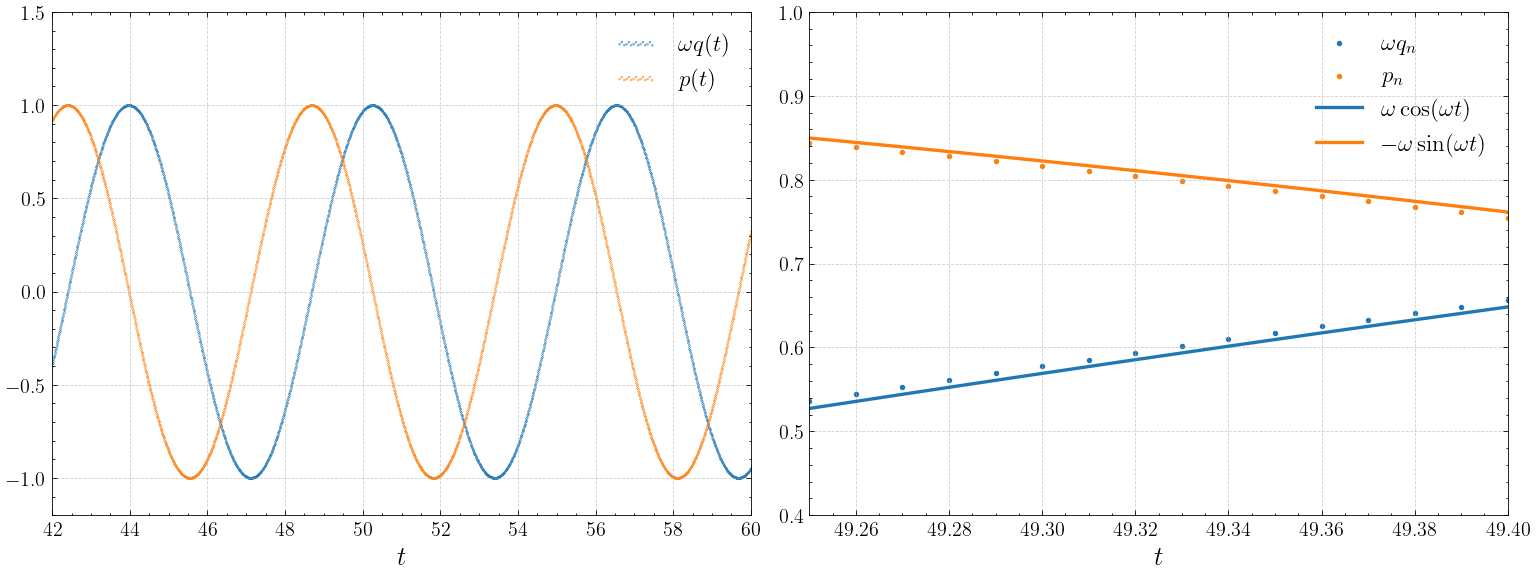

In [135]:
# Now the plot for q(t) and p(t)
time = np.arange(0, total_time, dt)
plt.figure(figsize=(13, 5), dpi=120)
plt.subplot(1,2,1)
plt.scatter(time, omega*q_traj, label=r'$\omega q(t)$', color='tab:blue', s = 0.1, linewidth=1)
plt.scatter(time, p_traj, label=r'$p(t)$', color='tab:orange', s = 0.1, linewidth=1)
plt.xlim(42,60)
plt.ylim(-1.2,1.5)
plt.xlabel('$t$', fontsize=16)
plt.legend(fontsize=14, loc ='upper right', scatterpoints=15)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.tight_layout()
plt.subplot(1,2,2)
plt.scatter(time, omega*q_traj, label=r'$\omega q_n$', color='tab:blue', s = 5, linewidth=1)
plt.scatter(time, p_traj, label=r'$p_n$', color='tab:orange', s = 5, linewidth=1)
time_zoom = np.arange(49.2, 49.4, 0.0001)
plt.plot(time_zoom, np.cos(omega*time_zoom), label=r'$\omega\cos(\omega t)$', color='tab:blue', linewidth=2)
plt.plot(time_zoom, -omega*np.sin(omega*time_zoom), label=r'$-\omega\sin(\omega t)$', color='tab:orange', linewidth=2)
plt.xlim(49.25,49.4)
plt.ylim(0.4,1)
plt.xlabel('$t$', fontsize=16)
plt.legend(fontsize=14, loc ='upper right')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.tight_layout()
plt.savefig('fig/qp_trajectory.pdf', dpi=300)
plt.show()

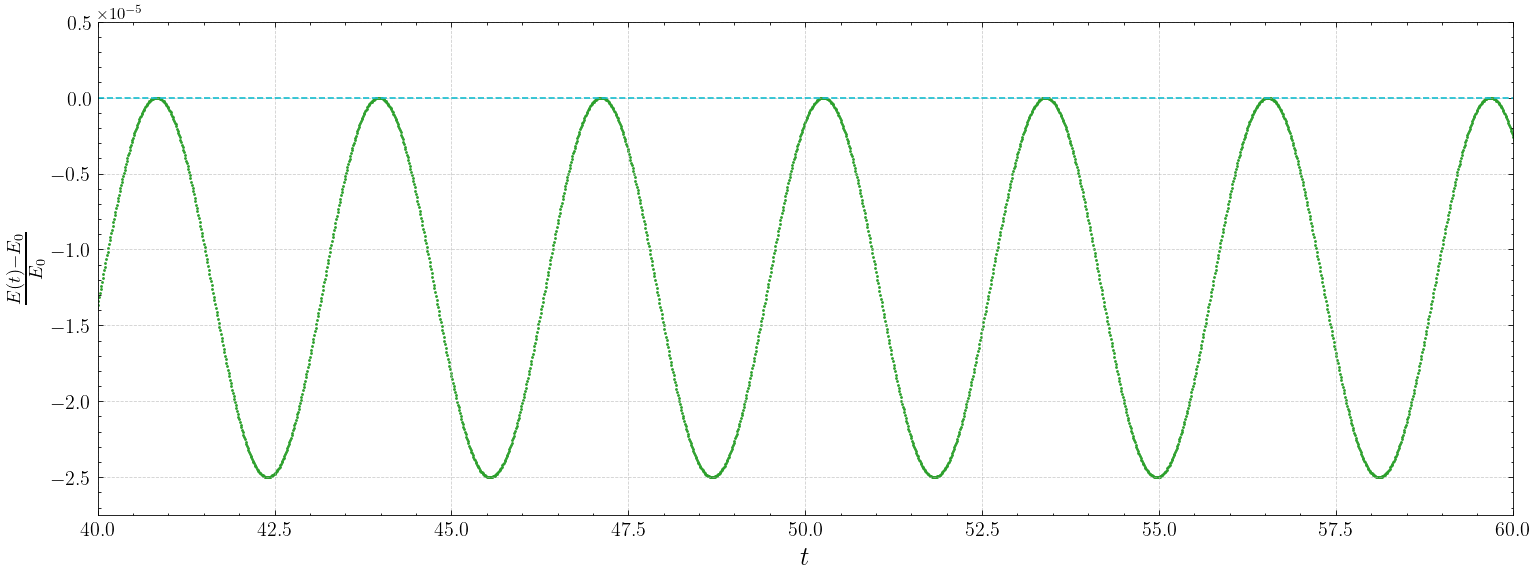

In [139]:
# Compute the energy over time
energy = 0.5 * p_traj**2 + 0.5 * omega**2 * q_traj**2
theoretical_energy = 0.5 * omega**2 * q**2  # Initial total energy

energy_normalized = (energy - theoretical_energy) / theoretical_energy
plt.figure(figsize=(13, 5), dpi=120)
plt.scatter(time, energy_normalized, color='tab:green', s=0.5,linewidth=1)
plt.xlim(40,60)
plt.ylim(-2.75e-5,0.5e-5)
plt.xlabel(fr'$t$', fontsize=16)
plt.ylabel(fr'$\frac{{E(t) - E_0}}{{E_0}}$', fontsize=16)
plt.axhline(0, color='tab:cyan', linestyle='--')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.tight_layout()
#plt.savefig('fig/energy_conservation.pdf', dpi=300)
plt.show()

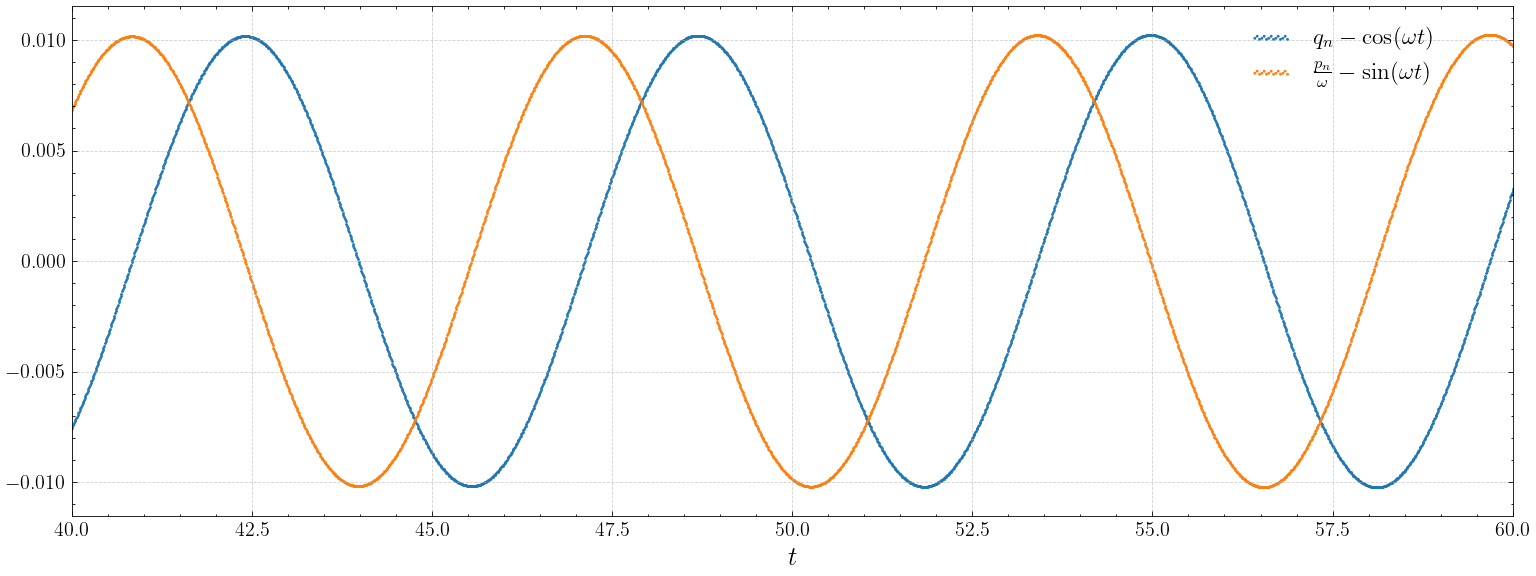

Maximum deviation in q: 0.010490727179999427
Maximum deviation in p: 0.010497228468051789


In [ ]:
analytical_q = (q * np.cos(omega * time))
analytical_p = -q * omega * np.sin(omega * time)

difference_q = omega*(q_traj - analytical_q)
difference_p = p_traj - analytical_p

plt.figure(figsize=(13, 5), dpi=120)
plt.xlim(40,60)
plt.scatter(time, difference_q, label=r'$q_n - \cos(\omega t)$', color='tab:blue', linewidth=1, s=0.5)
plt.scatter(time, difference_p, label=r'$\frac{{p_n}}{{\omega}} -  \sin(\omega t)$', color='tab:orange', linewidth=1, s=0.5)
plt.xlabel('$t$', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.tight_layout() 
plt.legend(fontsize=14, loc='upper right', scatterpoints=15, bbox_to_anchor=(0.96,1))
#plt.savefig('./fig/deviation_analytical.pdf', dpi=300)
plt.show()

print(f'Maximum deviation in q: {np.max(np.abs(difference_q))}')
print(f'Maximum deviation in p: {np.max(np.abs(difference_p))}')

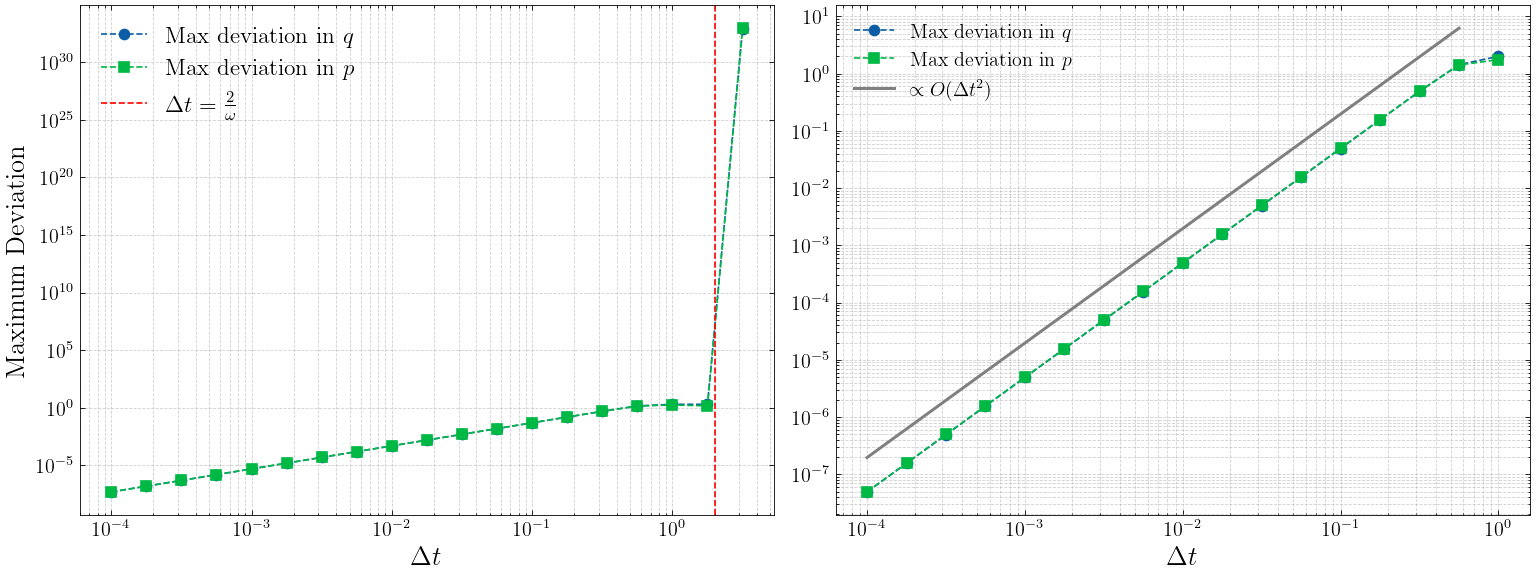

In [177]:
#Fix omega and see how the errors change with different dt values
# Fix now delta t = 0.01 and explore what happens when omega is changed
errors_q = []
errors_p = []
omega = 1
range_epsilons = np.arange(-4,0.75,0.25, dtype=float)

q_init = 1
p_init = 0

for exp in range_epsilons:
    epsilon = 10**float(exp)
    q_traj, p_traj = run(omega, epsilon, 120.0, q_init, p_init)  
    time = np.arange(0, 120., epsilon)[:len(q_traj)] + epsilon

    analytical_q = (q_init * np.cos(1 * time))
    analytical_p = -q_init * 1 * np.sin(1 * time)

    difference_q = omega*(q_traj - analytical_q)
    difference_p = p_traj - analytical_p

    max_dev_q = np.max(np.abs(difference_q))
    max_dev_p = np.max(np.abs(difference_p))

    errors_q.append(max_dev_q)
    errors_p.append(max_dev_p)

plt.figure(figsize=(13, 5), dpi=120)
plt.subplot(1,2,1)
plt.loglog(10**range_epsilons, errors_q, label='Max deviation in $q$', marker='o', linestyle='--')
plt.loglog(10**range_epsilons, errors_p, label='Max deviation in $p$', marker='s', linestyle='--')
plt.xlabel(r'$\Delta t$', fontsize=16)
plt.ylabel('Maximum Deviation', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.axvline(x=2./ omega, c="red", linestyle="--", label=fr'$\Delta t = \frac{{2}}{{\omega}}$')
plt.legend(fontsize=14, loc='upper left', scatterpoints=15)
plt.tight_layout() 

plt.subplot(1,2,2)
plt.loglog(10**range_epsilons[:-2], errors_q[:-2], label='Max deviation in $q$', marker='o', linestyle='--')
plt.loglog(10**range_epsilons[:-2], errors_p[:-2], label='Max deviation in $p$', marker='s', linestyle='--')
plt.xlabel(r'$\Delta t$', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)

# Reference straight line with slope 2 (Velocity Verlet global error ~ O(dt^2))
ref_x = 10**range_epsilons[:-3]
ref_y = 4*errors_q[0] * (ref_x / ref_x[0])**2
plt.loglog(ref_x, ref_y, color='gray', linestyle='-', label=r'$\propto O(\Delta t^2)$', linewidth = 1.8)

plt.legend(fontsize=12, loc='upper left')
plt.tight_layout() 

plt.savefig('fig/max_deviation_vs_deltat.pdf', dpi=300)
plt.show()

/tmp/ipykernel_5466/430491348.py:14: RuntimeWarning: overflow encountered in scalar multiply
  a_t_dt = -omega**2 * q
/tmp/ipykernel_5466/430491348.py:17: RuntimeWarning: invalid value encountered in scalar add
  p += 0.5 * a_t_dt * dt


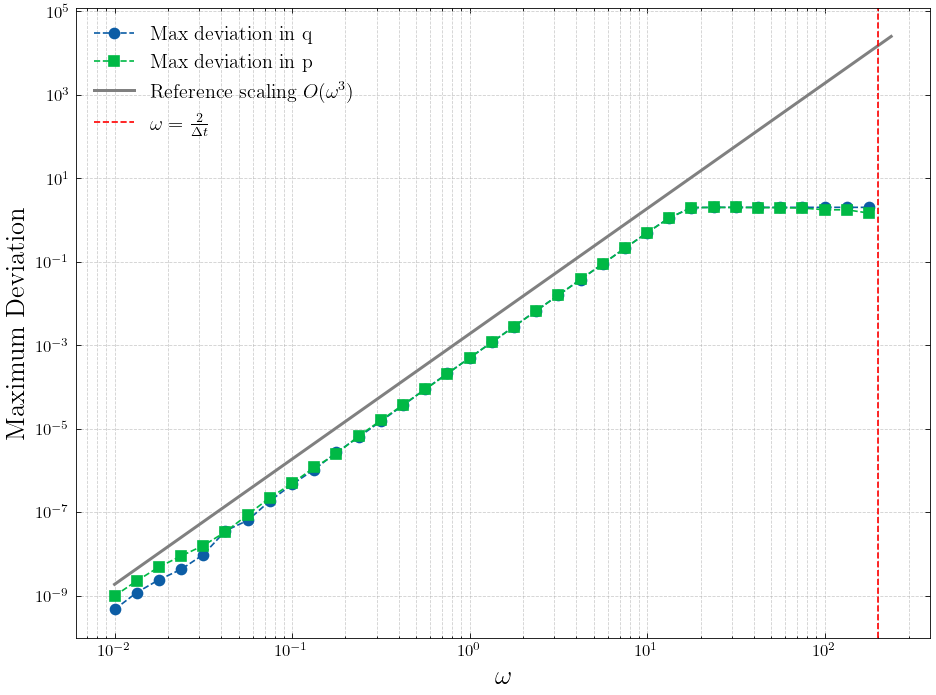

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Assumo che la funzione 'run' sia definita come nelle chat precedenti
# e che restituisca gli array includendo t=0.

errors_q = []
errors_p = []

epsilon = 0.01
omegas_exp = np.arange(-2, 2.5, 0.125, dtype=float) 

q_init = 1
p_init = 0
total_time = 120.0

for exp in omegas_exp:
    omega = 10**exp
    
    q_traj, p_traj = run(omega, epsilon, total_time, q_init, p_init)  
    
    time = np.linspace(epsilon, total_time, len(q_traj))
  
    analytical_q = (q_init * np.cos(omega * time))
    analytical_p = -q_init * omega * np.sin(omega * time)
    
    difference_q = (q_traj - analytical_q)
    difference_p = (p_traj - analytical_p)
    
    max_dev_q = np.max(np.abs(difference_q))
    max_dev_p = np.max(np.abs(p_traj - analytical_p)) / (omega)
    
    errors_q.append(max_dev_q)
    errors_p.append(max_dev_p)


plt.figure(figsize=(8, 6), dpi=120)

x_vals = 10**omegas_exp

plt.loglog(x_vals, errors_q, label='Max deviation in q', marker='o', linestyle='--')
plt.loglog(x_vals, errors_p, label='Max deviation in p', marker='s', linestyle='--')


stability_limit = 2.0 / epsilon

ref_y = 4*errors_q[0] * (x_vals / x_vals[0])**3
plt.plot(x_vals, ref_y, color='gray', linestyle='-', label=r'Reference scaling $O(\omega^3)$', linewidth=1.8)
plt.axvline(x=stability_limit, c="red", linestyle="--", label=fr'$\omega = \frac{{2}}{{\Delta t}}$')

plt.xlabel(r'$\omega$', fontsize=16)
plt.ylabel('Maximum Deviation', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(fontsize=12, loc='upper left')
plt.savefig('fig/max_deviation_vs_omega.pdf', dpi=300)
plt.tight_layout() 
plt.show()

## Ex 2 -- Simulation of a Lennar-Jones fluid

We will leverage the capabilities of the software LAMPPS. The parameters of the simulation are defined in an external script `lennardjones.lmp`. First of all, let's check whether the energy is conserved or it displays a drift:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

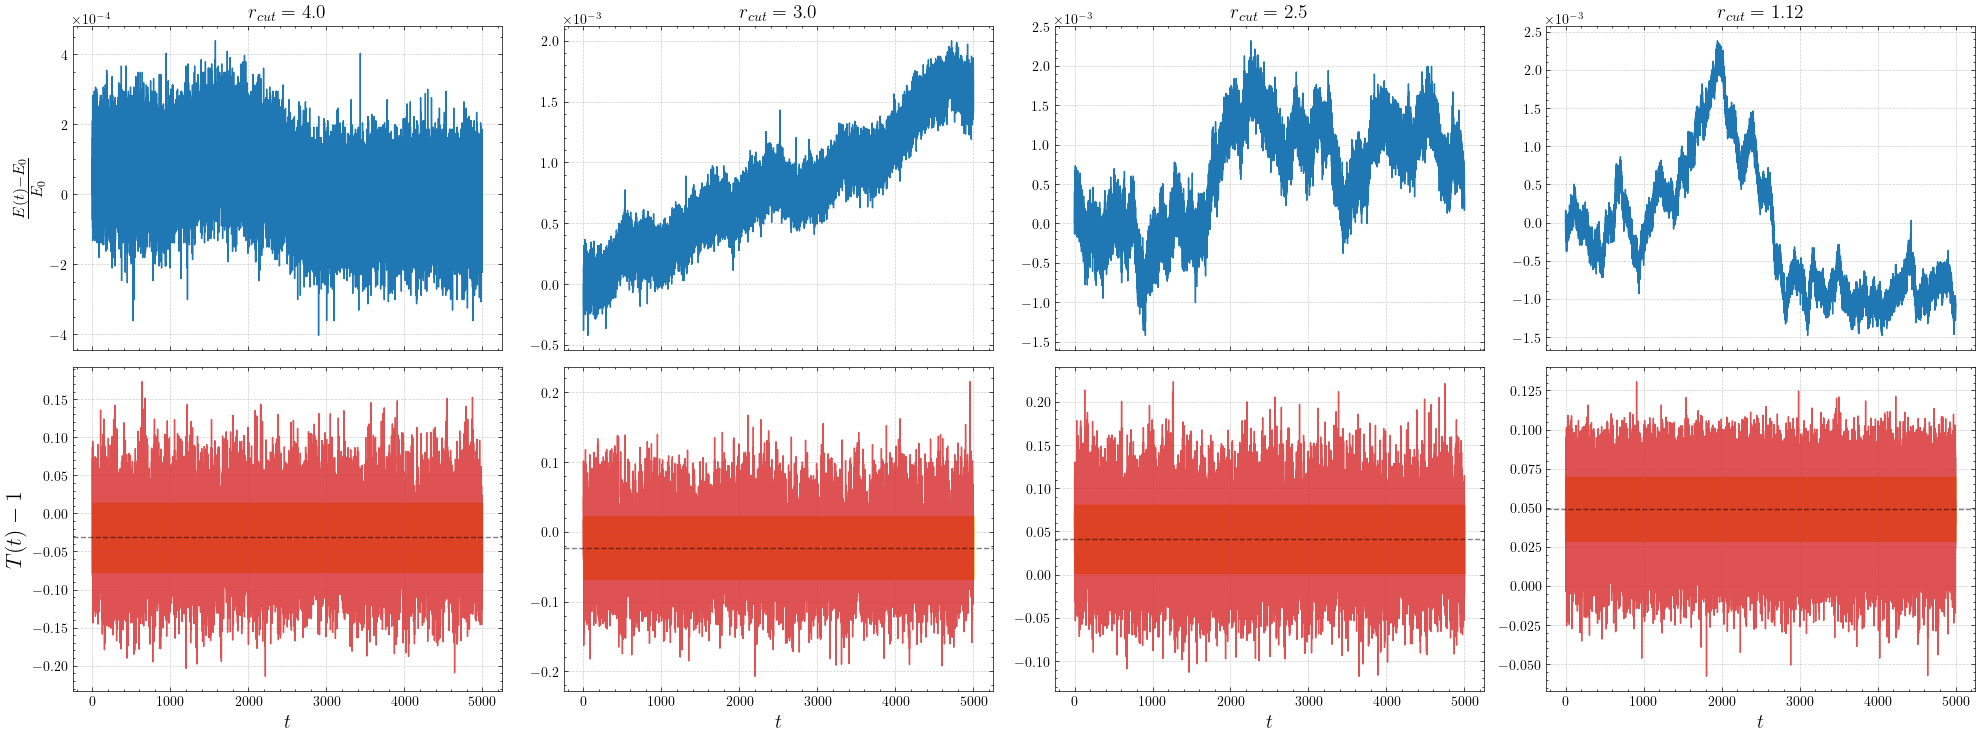

r_cut 	 Avg Temp 	 Std Dev
4.00 	 0.9685 	 0.0453
3.00 	 0.9775 	 0.0447
2.50 	 1.0413 	 0.0394
1.12 	 1.0493 	 0.0204


In [3]:
rcuts = [4.00, 3.00, 2.50, 1.12]
data_dict = {}

columns = ['Time', 'Temp', 'PotEng', 'KinEng', 'TotEng']

d = 0.4
for rc in rcuts:
    filename = f'./data_from_lammps/energy_data_{d:.2f}_{rc:.2f}.dat'
    df = pd.read_csv(filename, sep='\s+', comment='#', names=columns, skiprows=1)
    E0 = df['TotEng'].iloc[0]
    drift = (df['TotEng'] - E0) / np.abs(E0) 
    
    avg_temp = np.mean(df["Temp"])
    std_temp = np.std(df["Temp"])
    
    data_dict[rc] = {
        'df': df,
        'drift': drift,
        'avg_temp': avg_temp,
        'std_temp': std_temp
    }


fig, axes = plt.subplots(2, 4, figsize=(20, 8), dpi=100, sharex=True)
for i, rc in enumerate(rcuts):
    data = data_dict[rc]
    df = data['df']
    drift = data['drift']
    
    ax_en = axes[0, i]
    ax_en.plot(df['Time'], drift, color='tab:blue', linewidth=1)
    ax_en.set_title(f"$r_{{cut}} = {rc}$", fontsize=14, fontweight='bold')
    ax_en.grid(True, linestyle='--', alpha=0.6)
    ax_en.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    

    if i == 0:
        ax_en.set_ylabel(r'$\frac{E(t) - E_0}{E_0}$', fontsize=16)


    ax_temp = axes[1, i]
    ax_temp.plot(df['Time'], df["Temp"] - 1, color='tab:red', alpha=0.8, linewidth=1)
    
    mean_shifted = data['avg_temp'] - 1
    std = data['std_temp']
    
    ax_temp.axhline(mean_shifted, color='black', linestyle='--', alpha=0.5, label='Mean')
    ax_temp.fill_between(df['Time'], mean_shifted - std, mean_shifted + std, 
                         color='orange', alpha=0.9, label=r'$\pm \sigma$')
    
    ax_temp.grid(True, linestyle='--', alpha=0.6)

    ax_temp.set_xlabel(r'$t$', fontsize=14)
    if i == 0:
        ax_temp.set_ylabel(r'$T(t) - 1$', fontsize=16)
#plt.savefig("./fig/energyLJ_0_40.pdf", dpi = 300)
plt.tight_layout()
plt.subplots_adjust(top=0.9) 
plt.show()

# Now print the temp averages and stds
print(f"r_cut \t Avg Temp \t Std Dev")
for rc in rcuts:
    avg_temp = data_dict[rc]['avg_temp']
    std_temp = data_dict[rc]['std_temp']
    print(f"{rc:.2f} \t {avg_temp:.4f} \t {std_temp:.4f}")

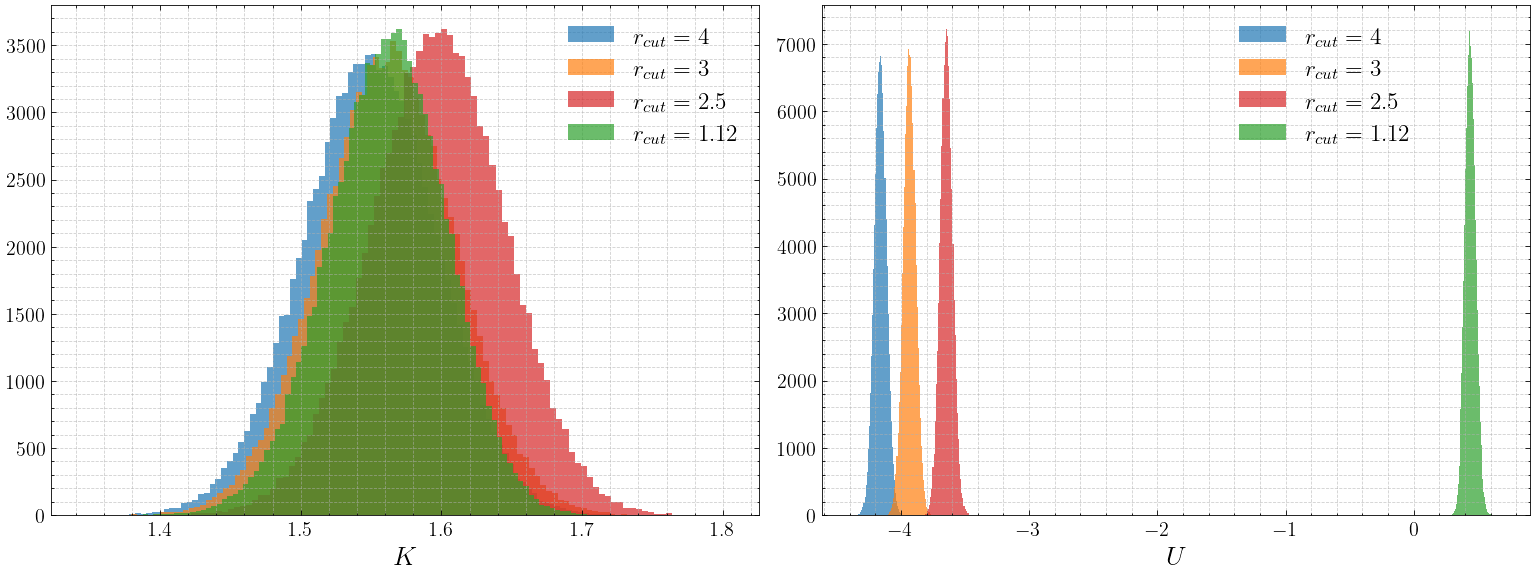

In [9]:
d = 0.62
rcuts = [4.00, 3.00, 2.50, 1.12]
data_dict = {}

columns = ['Time', 'Temp', 'PotEng', 'KinEng', 'TotEng']
df1 = pd.read_csv(f"./data_from_lammps/energy_data_{d:.2f}_4.00.dat", sep='\s+', comment='#', names=columns, skiprows=1)
df2 = pd.read_csv(f"./data_from_lammps/energy_data_{d:.2f}_3.00.dat", sep='\s+', comment='#', names=columns, skiprows=1)
df3 = pd.read_csv(f"./data_from_lammps/energy_data_{d:.2f}_2.50.dat", sep='\s+', comment='#', names=columns, skiprows=1)
df4 = pd.read_csv(f"./data_from_lammps/energy_data_{d:.2f}_1.12.dat", sep='\s+', comment='#', names=columns, skiprows=1)

ke1 = df1['KinEng']
pe1 = df1['PotEng']
ke2 = df2['KinEng']
pe2 = df2['PotEng']
ke3 = df3['KinEng']
pe3 = df3['PotEng']
ke4 = df4['KinEng']
pe4 = df4['PotEng']

plt.figure(figsize=(13, 5), dpi=120)
plt.subplot(1,2,1)
plt.hist(ke1, bins = 100, label=fr'$r_{{cut}} = 4$', color='tab:blue', linewidth=1.5, alpha = 0.7)
plt.hist(ke2, bins=100, label=fr'$r_{{cut}} = 3$', color='tab:orange', linewidth=1.5, alpha = 0.7)
plt.hist(ke3, bins=100, label=fr'$r_{{cut}} = 2.5$', color='tab:red', linewidth=1.5, linestyle='--', alpha = 0.7)
plt.hist(ke4, bins=100, label=fr'$r_{{cut}} = 1.12$', color='tab:green', linewidth=1.5, linestyle='--', alpha = 0.7)
plt.xlabel('$K$', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(fontsize=14, loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.tight_layout()
plt.subplot(1,2,2)
plt.hist(pe1, bins = 50, label=fr'$r_{{cut}} = 4$', color='tab:blue', linewidth=1.5, alpha = 0.7)
plt.hist(pe2, bins=50, label=fr'$r_{{cut}} = 3$', color='tab:orange', linewidth=1.5, alpha = 0.7)
plt.hist(pe3, bins=50, label=fr'$r_{{cut}} = 2.5$', color='tab:red', linewidth=1.5, linestyle='--', alpha = 0.7)
plt.hist(pe4, bins=50, label=fr'$r_{{cut}} = 1.12$', color='tab:green', linewidth=1.5, linestyle='--', alpha = 0.7)
plt.xlabel('$U$', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(fontsize=14, loc='upper right', bbox_to_anchor=(0.86,1))
plt.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
plt.tight_layout()   
plt.savefig('fig/hist_kin_pot_LJ_0_62.pdf', dpi=300)
plt.show()

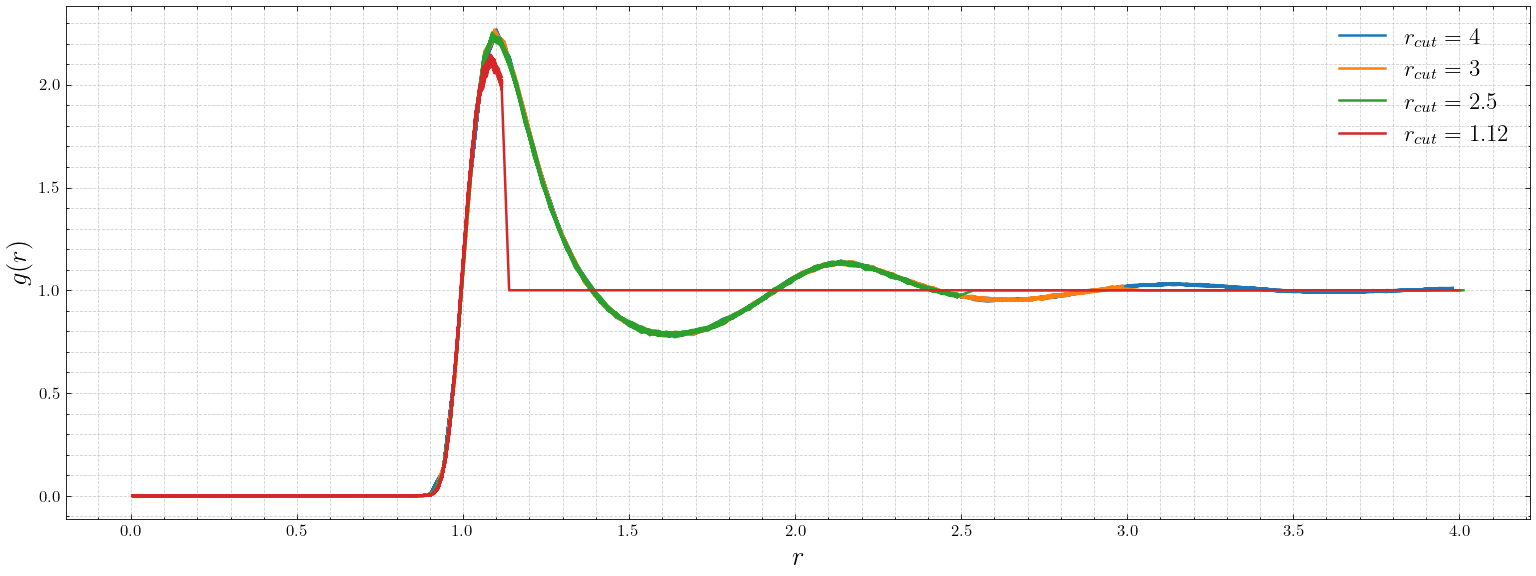

In [13]:
# Now visualize the radial distribution function
d = 0.62
filename_rdf1 = f'./data_from_lammps/rdf_data_{d:.2f}_4.00.dat'
filename_rdf2 = f'./data_from_lammps/rdf_data_{d:.2f}_3.00.dat'
filename_rdf3 = f'./data_from_lammps/rdf_data_{d:.2f}_2.50.dat' 
filename_rdf4 = f'./data_from_lammps/rdf_data_{d:.2f}_1.12.dat'   
columns_rdf = ['id', 'r', 'g_r', 'count' ]
df_rdf1 = pd.read_csv(filename_rdf1, sep='\s+', comment='#', names=columns_rdf, skiprows=1)
df_rdf2 = pd.read_csv(filename_rdf2, sep='\s+', comment='#', names=columns_rdf, skiprows=1)
df_rdf3 = pd.read_csv(filename_rdf3, sep='\s+', comment='#', names=columns_rdf, skiprows=1)
df_rdf4 = pd.read_csv(filename_rdf4, sep='\s+', comment='#', names=columns_rdf, skiprows=1)
max_length = df_rdf1['g_r'].shape[0]  # Assuming all rdf files have the same length

radial1 = df_rdf1['g_r']

radial2 = df_rdf2['g_r']
radial2_radius = np.array(df_rdf2['r'])
step_radial2 = radial2_radius[2] - radial2_radius[1]
still_left = (4-3)/step_radial2
still_left_vector = np.ones(int(still_left))
radial2 = np.concatenate((radial2, still_left_vector))
radial2_radius = np.concatenate((radial2_radius, np.arange(radial2_radius[-1] + 2*step_radial2, 4 + step_radial2, step_radial2)))

radial3 = df_rdf3['g_r']
radial3_radius = np.array(df_rdf3['r'])
step_radial3 = radial3_radius[2] - radial3_radius[1]
still_left = (4-2.5)/step_radial3
still_left_vector = np.ones(int(still_left))
radial3 = np.concatenate((radial3, still_left_vector))
radial3_radius = np.concatenate((radial3_radius, np.arange(radial3_radius[-1] + 2*step_radial3, 4 + step_radial3, step_radial3)))

radial4 = df_rdf4['g_r']
radial4_radius = np.array(df_rdf4['r'])
step_radial2 = radial4_radius[2] - radial4_radius[1]
still_left = (4-1.12)/step_radial2
still_left_vector = np.ones(int(still_left))
radial4 = np.concatenate((radial4, still_left_vector))
radial4_radius = np.concatenate((radial4_radius, np.arange(radial4_radius[-1] + 2*step_radial2, 4 + step_radial2, step_radial2)))


# FIll with zero until r = 4
plt.figure(figsize=(13, 5), dpi=120)
plt.plot(df_rdf1['r'], df_rdf1['g_r'], color='tab:blue', linewidth=1.5, label = fr"$r_{{cut}} = 4$")
plt.plot(radial2_radius, radial2, color='tab:orange', linewidth=1.5, label = fr"$r_{{cut}} = 3$")
plt.plot(radial3_radius, radial3, color='tab:green', linewidth=1.5, label = fr"$r_{{cut}} = 2.5$")
plt.plot(radial4_radius[:-1], radial4, color='tab:red', linewidth=1.5, label = fr"$r_{{cut}} = 1.12$")
plt.xlabel(r'$r$', fontsize=16)
plt.ylabel(r'$g(r)$', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig('fig/rdf_LJ_0_62.pdf', dpi=300)
plt.show() 